In [66]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

%matplotlib inline 

## 1-1 make_wave 함수 만들기
<pre>
인자 : n_samples(기본값 100)
내용 : 주어진 샘플의 개수에 맞는 난수를 x, y를 만들어낸다.
       x의 차수는 2, y의 차수는 1이다.
기능 : x는 2차, y는 1차의 값을 갖는 난수를 발생시킨다.
</pre>

In [44]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

## 1-2 함수를 사용해 X, y의 값을 생성해 보기

In [45]:
X, y = make_wave(n_samples=10)
print(X.shape, y.shape)
print(X.dtype, y.dtype)
print(X.size, y.size)
print(X.ndim, y.ndim)
# ndim : the number of axes (dimensions) of the array.

(10, 1) (10,)
float64 float64
10 10
2 1


## 02 Regression 모델을 이용한 예측 수행

## 2-1 그래프를 통한 회귀 모델 확인해 보기
<pre>
(가) mglearn 안의 plots.plot_linear_regression_wave()를 이용한 회귀 모델 확인
(나) 60개의 샘플을 생성 후, 회귀 모델을 만들어, 이를 통한 예측을 수행.

아래 그래프 상세 소스 코드(plot_linear_regression_wave)는 해당 URL 참조
</pre>
<a href="https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/mglearn/plot_linear_regression.py" target="_blank">plot_linear_regression 소스 코드</a>

w[0]: 0.393906  b: -0.031804


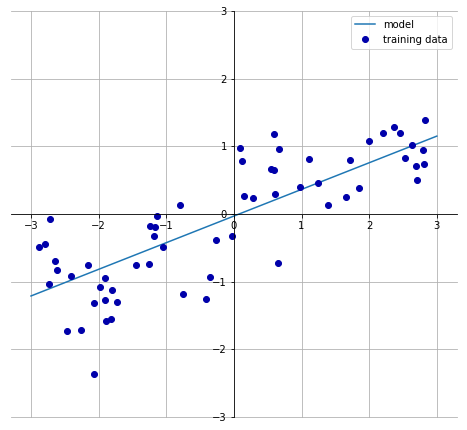

In [49]:
mglearn.plots.plot_linear_regression_wave()

## 2-2 회귀 모델 만들어보기
<pre>
(가) 60개의 샘플 생성
(나) 데이터 셋 나누기
(다) 회귀 모델 학습
(라) 가중치 확인
(마) score 확인
</pre>

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

#### (가) 가중치(weight) 또는 계수
<pre>
Note : coef_와 intercept_ 뒤의 밑줄은 scikit-learn은 훈련데이터에서 유도된 속성(값)은 항상 끝에 밑줄을 붙입니다.
이유 : 사용자 지정한 매개변수와 구분하기 위해서
</pre>

In [104]:
print("lr.coef_ : {}".format(lr.coef_))
print("lr.intercept_ : {}".format(lr.intercept_))

lr.coef_ : [ 0.39390555]
lr.intercept_ : -0.03180434302675973


#### (나) 훈련 데이터 세트와 테스트 데이터 세트 점수

In [105]:
print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.67
테스트 데이터 세트 점수 : 0.66


## 03 Boston 데이터 셋 회귀 모델 적용
<pre>
(가) MinMaxScaler를 이용하여 데이터 값의 정규화(0~1)를 수행한다.
(나) 데이터 셋을 확장시키기(PolynomialFeatures 함수이용)
(다) load_extended_boston() 함수 만들기
(라) 점수 확인
</pre>

In [107]:
from sklearn.datasets import load_boston

boston = load_boston()  # 데이터 셋 불러오기
X1 = MinMaxScaler().fit_transform(boston.data)  # 입력 데이터 정규화
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X1)
X.shape

(506, 104)

### (나) load_extended_boston() 함수 생성해 두기

In [110]:
def load_extended_boston():
    boston = load_boston()  # 데이터 셋 불러오기
    X = boston.data         # 입력 데이터 
    
    X = MinMaxScaler().fit_transform(boston.data)  # 입력 데이터 정규화
    # PolynomialFeatures 적용전
    print(X.shape, y.shape)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

### 확장된 boston 데이터 셋

In [111]:
X, y = load_extended_boston()
print(X.shape, y.shape)

(506, 13) (506,)
(506, 104) (506,)


### 평가 확인
<pre>
훈련 데이터 세트 점수와 테스트 데이터 세트 점수가 많이 차이가 있다.
즉, 모델이 과대적합되었다. 
따라서 우리는 복잡도를 제어할 수 있는 모델을 사용해야 한다.
</pre>

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 데이터 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.79


### Reference
<pre>
http://taewan.kim/post/numpy_cheat_sheet/
</pre>